In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

import numpy as np 

from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from keras.layers import InputLayer, LSTM, Dense, Flatten
from keras.models import Sequential

import tensorflow as tf 


2024-05-18 11:00:27.168633: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 11:00:28.083598: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-18 11:00:30.085970: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-18 11:00:33.025715: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
dataFileName = "CombinedData.csv"
df = pd.read_csv(dataFileName)

In [3]:
data = df[["datetime", "tempmax", "tempmin", "temp", "feelslikemax", "feelslike", "feelslike", "dew", "humidity", "precip"]]
data.shape

(8514, 10)

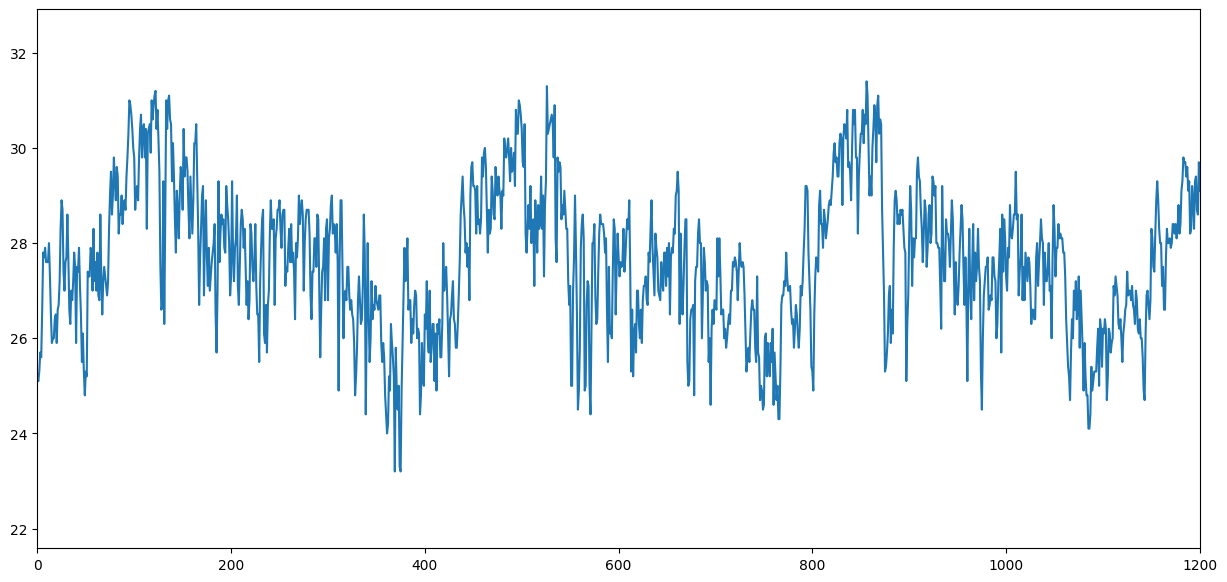

In [4]:
plt.figure(figsize = (15, 7))
plt.xlim(0, 1200)
plt.plot(data["temp"])

In [15]:
# Only the first 3 Years as Test
train_data = data["temp"].to_numpy()[:4500].reshape(-1, 1)
TempScaler = MinMaxScaler()
# training_data = TempScaler.fit_transform(train_data)
training_data = train_data
training_data = training_data.flatten()

# Window the Data for the last 30 Days
WINDOW_LENGTH = 30
X = []
y = []

for i in range(len(training_data) - WINDOW_LENGTH):
    X.append(training_data[i : i + WINDOW_LENGTH])
    y.append(training_data[i + WINDOW_LENGTH])

X = np.array(X, "float32")
y = np.array(y)

X.shape, y.shape


((4470, 30), (4470,))

In [16]:
# Build Model
# RFR = RandomForestRegressor()

PredictorModel = LinearRegression()

# PredictorModel = Sequential([
#     InputLayer((WINDOW_LENGTH, 1)),
#     LSTM(32, return_sequences = True),
#     LSTM(32, return_sequences = True),
#     LSTM(32),
#     Flatten(),
#     Dense(1)
# ])

# num_features = 1
# OUT_STEPS = 1 

# class FeedBack(tf.keras.Model):
#     def __init__(self, units, out_steps):
#         super().__init__()
#         self.out_steps = out_steps
#         self.units = units
#         self.lstm_cell = tf.keras.layers.LSTMCell(units)
#         # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
#         self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
#         self.dense = tf.keras.layers.Dense(num_features)

#     def warmup(self, inputs):
#         # inputs.shape => (batch, time, features)
#         # x.shape => (batch, lstm_units)
#         x, *state = self.lstm_rnn(inputs)

#         # predictions.shape => (batch, features)
#         prediction = self.dense(x)
#         return prediction, state
    
#     def call(self, inputs, training=None):
#         # Use a TensorArray to capture dynamically unrolled outputs.
#         predictions = []
#         # Initialize the LSTM state.
#         prediction, state = self.warmup(inputs)

#         # Insert the first prediction.
#         predictions.append(prediction)

#         # Run the rest of the prediction steps.
#         for n in range(1, self.out_steps):
#             # Use the last prediction as input.
#             x = prediction
#             # Execute one lstm step.
#             x, state = self.lstm_cell(x, states=state,
#                                     training=training)
#             # Convert the lstm output to a prediction.
#             prediction = self.dense(x)
#             # Add the prediction to the output.
#             predictions.append(prediction)

#         # predictions.shape => (time, batch, features)
#         predictions = tf.stack(predictions)
#         # predictions.shape => (batch, time, features)
#         predictions = tf.transpose(predictions, [1, 0, 2])
#         return predictions






# feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)
# feedback_model.compile(loss = "mse", optimizer = "adam", metrics = ["mae", "mse"])


In [136]:
# copyX = X.reshape(X.shape[0], X.shape[1], 1)
# copyX.shape

(4470, 30, 1)

In [17]:
# Train Model
# RFR.fit(X, y)
PredictorModel.fit(X, y)
# history = feedback_model.fit(copyX, y, epochs=20)
# PredictorModel.compile(loss = "mae", optimizer = "adam", metrics = ["mse"])
# PredictorModel.fit(X, y, validation_split=0.1, epochs=10)

LinearRegression()

In [18]:
# Build Testing Data
test_data = data["temp"].to_numpy()[4500:8000].reshape(-1, 1)
# testing_data = TempScaler.transform(test_data)
testing_data = test_data
testing_data = testing_data.flatten()

# Window the Data for the last 30 Days
TEST_X = []
TEST_y = []

for i in range(len(testing_data) - WINDOW_LENGTH):
    TEST_X.append(testing_data[i : i + WINDOW_LENGTH])
    TEST_y.append(testing_data[i + WINDOW_LENGTH])

TEST_X = np.array(TEST_X, "float32")
TEST_y = np.array(TEST_y)

TEST_X.shape, TEST_y.shape

((3470, 30), (3470,))

In [154]:
# feedback_model.predict(TEST_X[1].reshape(1, -1, 1)), TEST_y[1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


(array([[[0.5059586]]], dtype=float32), 0.8404255319148941)

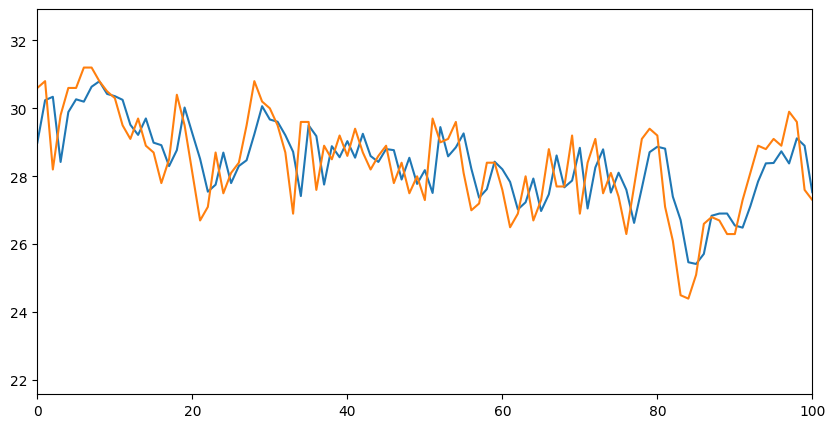

In [20]:
# Normal Prediction
# RFR_pred_normal = RFR.predict(TEST_X).reshape(-1, 1)
# pred_normal = feedback_model.predict(TEST_X.reshape(TEST_X.shape[0], -1, 1)).reshape(-1, 1)
# pred_normal = PredictorModel.predict(TEST_X).reshape(-1, 1)
pred_normal = PredictorModel.predict(TEST_X)
# pred_normal = TempScaler.inverse_transform(pred_normal).flatten()
# tY = TempScaler.inverse_transform(TEST_y.reshape(-1, 1)).flatten()
ty = TEST_y

plt.figure(figsize=(10, 5))
plt.plot(pred_normal, label = "Normal Prediction (RFR)")
plt.plot(tY, label="Actual Values")
plt.xlim(0, 100)
plt.show()

In [102]:
TEST_X[0].shape

(30,)

In [103]:
np.array([TEST_X[0]]).shape

(1, 30)

In [21]:
# Abnormal Prediction - AutoRegression
current_window = TEST_X[0]
predictions = []
for i in tqdm(range(len(TEST_y))):
    # print(i, current_window.shape, len(predictions))
    # current_prediction = RFR.predict(np.array([current_window]))
    # current_prediction = PredictorModel.predict(np.array([current_window]), verbose = 0)
    current_prediction = PredictorModel.predict(np.array([current_window]))
    predictions.append(current_prediction.flatten())
    current_window = current_window[1:]
    current_window = np.append(current_window, current_prediction)

predictions = np.array(predictions).flatten()

100%|██████████| 3470/3470 [00:00<00:00, 12917.83it/s]


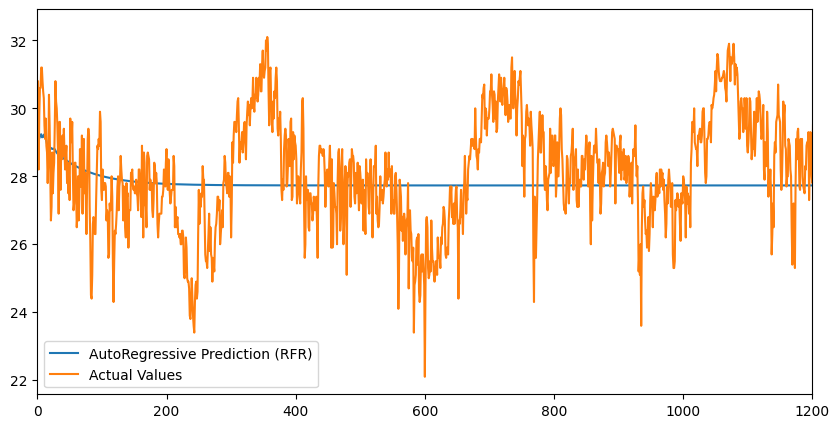

In [22]:
# RFR_pred_auto = predictions.reshape(-1, 1)
pred_auto = predictions
# RFR_pred_auto = TempScaler.inverse_transform(RFR_pred_auto).flatten()
# autoTY = TempScaler.inverse_transform(TEST_y.reshape(-1, 1)).flatten()
autoTY = TEST_y 

plt.figure(figsize=(10, 5))
plt.plot(pred_auto, label = "AutoRegressive Prediction (RFR)")
plt.plot(autoTY, label="Actual Values")
plt.xlim(0, 1200)
plt.legend()
plt.show()

In [ ]:
# Compare with Real